In [1]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train = train_images.reshape(60000, 28, 28, 1)
x_test = test_images.reshape(10000, 28, 28, 1)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train /= np.max(x_train)
x_test /= np.max(x_test)

In [3]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## building the model using Functional API

In [4]:
from keras.models import Model
from keras import layers

myInput = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(16, 3, activation='relu', padding='same')(myInput)
pool1 = layers.MaxPool2D(pool_size=2)(conv1)
conv2 = layers.Conv2D(32, 3, activation='relu', padding='same')(pool1)
pool2 = layers.MaxPool2D(pool_size=2)(conv2)
flat = layers.Flatten()(pool2)
out_layer = layers.Dense(10, activation='softmax')(flat)

model = Model(myInput, out_layer)

In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])

In [8]:
History = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7619 - loss: 0.8222 - val_accuracy: 0.9646 - val_loss: 0.1232
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9671 - loss: 0.1099 - val_accuracy: 0.9766 - val_loss: 0.0811
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9778 - loss: 0.0725 - val_accuracy: 0.9796 - val_loss: 0.0698
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9828 - loss: 0.0577 - val_accuracy: 0.9813 - val_loss: 0.0616
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9850 - loss: 0.0523 - val_accuracy: 0.9827 - val_loss: 0.0592
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9849 - val_loss: 0.0538
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9890 - loss: 0.0368 - val_accuracy: 0.9857 - val_loss: 0.0466
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.

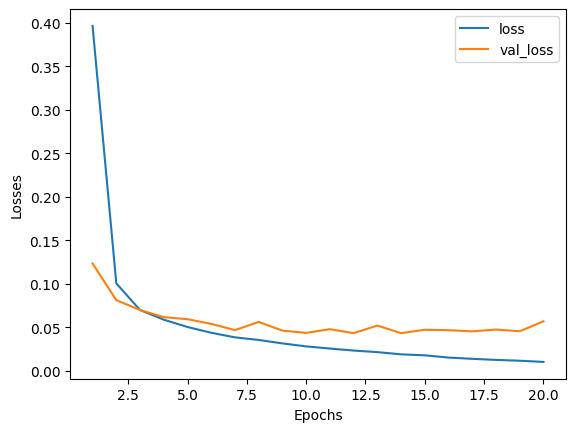

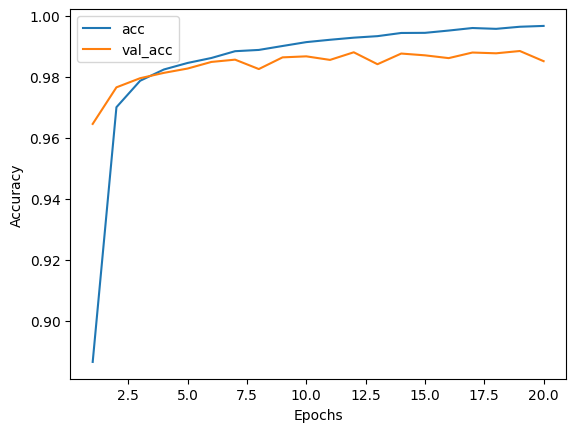

In [9]:
import matplotlib.pyplot as plt

loss = History.history['loss']
acc = History.history['accuracy']
val_loss = History.history['val_loss']
val_acc = History.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'])
plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'])

In [10]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9815 - loss: 0.0612


[0.04959789291024208, 0.9855999946594238]

## Using stride in conv layers instead of maxPoolings

In [11]:
from keras.models import Model
from keras import layers

myInput = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(16, 3, activation='relu', padding='same', strides=2)(myInput)
conv2 = layers.Conv2D(32, 3, activation='relu', padding='same', strides=2)(conv1)
flat = layers.Flatten()(conv2)
out_layer = layers.Dense(10, activation='softmax')(flat)

model = Model(myInput, out_layer)

In [12]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])
History = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7604 - loss: 0.8543 - val_accuracy: 0.9359 - val_loss: 0.2224
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9411 - loss: 0.2058 - val_accuracy: 0.9647 - val_loss: 0.1258
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9633 - loss: 0.1240 - val_accuracy: 0.9688 - val_loss: 0.1058
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9726 - loss: 0.0911 - val_accuracy: 0.9725 - val_loss: 0.0909
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0783 - val_accuracy: 0.9753 - val_loss: 0.0878
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.0691 - val_accuracy: 0.9789 - val_loss: 0.0761
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9815 - loss: 0.0600 - val_accuracy: 0.9779 - val_loss: 0.0771
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0527 - val_accuracy: 0.